<a href="https://colab.research.google.com/github/Kyllien/DRIM-Game/blob/main/MatriceTransitionGood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre Requis

In [1]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [41]:
#Import data from os
import os
os.chdir("/content/gdrive/My Drive/DRIM")

In [3]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 7.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [3]:
#Librairie
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import csv

# Mise en place de la base
## Ouverture de la base

Avec ajout de la deuxieme base de la finale

In [4]:
data = pd.read_csv('base_1.csv')
data2 = pd.read_csv('base_2.csv')
# print(np.unique(data['classe'])) #Aucun prob de classe

#rename the columns
data = data.rename(columns={"classe": "State", "dtf_per_trt": "Time", "ID_BCR_TRS": "ID"})
data2 = data2.rename(columns={"classe": "State", "dtf_per_trt": "Time", "ID_BCR_TRS": "ID"})

# Put Time in Date Format
data["Time"]=pd.to_datetime(data["Time"])
data2["Time"]=pd.to_datetime(data2["Time"])

#Concatenation avec la deuxieme base
data = pd.concat([data,data2])

## Modification de la base avec une ligne = 1 ID

In [5]:
df=data
df=df.sort_values(by=["Time"])
ID=np.unique(df["ID"])
df2=pd.DataFrame(ID,columns=["ID"])
compteur=0
for i in np.unique(df["Time"]):
  print(i)
  df3=df[df["Time"]==i]
  df3=df3[["ID","State"]]
  df3=df3.rename({'ID': 'ID', 'State': 'Date'+str(compteur)}, axis='columns')
  compteur=compteur+1
  df2=df2.merge(df3,on='ID',how='left')


2010-01-31T00:00:00.000000000
2010-02-28T00:00:00.000000000
2010-03-31T00:00:00.000000000
2010-04-30T00:00:00.000000000
2010-05-31T00:00:00.000000000
2010-06-30T00:00:00.000000000
2010-07-31T00:00:00.000000000
2010-08-31T00:00:00.000000000
2010-09-30T00:00:00.000000000
2010-10-31T00:00:00.000000000
2010-11-30T00:00:00.000000000
2010-12-31T00:00:00.000000000
2011-01-31T00:00:00.000000000
2011-02-28T00:00:00.000000000
2011-03-31T00:00:00.000000000
2011-04-30T00:00:00.000000000
2011-05-31T00:00:00.000000000
2011-06-30T00:00:00.000000000
2011-07-31T00:00:00.000000000
2011-08-31T00:00:00.000000000
2011-09-30T00:00:00.000000000
2011-10-31T00:00:00.000000000
2011-11-30T00:00:00.000000000
2011-12-31T00:00:00.000000000
2012-01-31T00:00:00.000000000
2012-02-29T00:00:00.000000000
2012-03-31T00:00:00.000000000
2012-04-30T00:00:00.000000000
2012-05-31T00:00:00.000000000
2012-06-30T00:00:00.000000000
2012-07-31T00:00:00.000000000
2012-08-31T00:00:00.000000000
2012-09-30T00:00:00.000000000
2012-10-31

## Modif de la base
Creation d'une classe pour les non rating et changement de type pour les cellules

In [6]:
#Creation d'une classe pour les non rating : 12
df3=df2.copy()
df3=df3.fillna(12)

In [7]:
#Changement de type float en int8
def TypeInt (df):
  df2 = df["ID"]
  df = df.drop(columns=["ID"])
  for i in df.columns:
    df2 = pd.concat([df2,pd.to_numeric(df[i],downcast='integer')],axis=1)
  return df2
df3 = TypeInt(df3)
df3.dtypes

ID         object
Date0        int8
Date1        int8
Date2        int8
Date3        int8
            ...  
Date127      int8
Date128      int8
Date129      int8
Date130      int8
Date131      int8
Length: 133, dtype: object

## Mise en place des defauts

In [ ]:
# #Mise en place du postulat : une personne qui tombe en défaut reste en défaut
# liste=[]
# for i, row in df3.iterrows():
#   if(row[row==11].empty==False):
#     row[row[row==11].index[0]:]=11
#   liste.append(row.values)
# df4=pd.DataFrame(liste,columns=df3.columns)


In [ ]:
#Enregistrement de la base ou chargement


# Creation des Matrices


## Matrice sans prise en compte de la classe NA

In [9]:
#Creation Matrice PIT sans les NR(12)
PIT={}
for i in range(1,132):
  u=df2.columns[i]
  m=df2.columns[i+1]
  PIT[i]=pd.crosstab(df2[u],df2[m],normalize="index",dropna=True)
  for j in range(1,11):
    PIT[i].loc[11,j] = 0
  PIT[i].loc[11,11] = 1

In [10]:
#Creation matrice TTC sans les NR(12)
TTC=PIT[1]
for i in range(2,96):
  TTC=TTC+PIT[i]
TTC=TTC/len(PIT)
TTC

Date1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Date0,,,,,,,,,,,
1.0,0.970357,0.014852,0.011744,0.002345,0.000176,0.000383,0.000069,0.000043,0.000023,0.000003,0.000007
2.0,0.025838,0.959496,0.001567,0.002870,0.004158,0.004869,0.001023,0.000079,0.000085,0.000004,0.000010
3.0,0.004818,0.027760,0.955731,0.000341,0.000384,0.004316,0.004964,0.001376,0.000190,0.000101,0.000019
4.0,0.000060,0.013048,0.030364,0.940812,0.000481,0.000699,0.011099,0.000105,0.003089,0.000171,0.000073
5.0,0.000059,0.009819,0.008680,0.022321,0.940846,0.000664,0.012350,0.000420,0.004502,0.000228,0.000113
6.0,0.000074,0.000932,0.014678,0.001824,0.015822,0.940915,0.001811,0.014090,0.006834,0.002751,0.000269
7.0,0.000040,0.000950,0.002507,0.008902,0.009430,0.017109,0.917311,0.001896,0.022824,0.017997,0.001034
8.0,0.000040,0.000387,0.006037,0.001126,0.001179,0.043849,0.036728,0.832132,0.014491,0.060491,0.003540
9.0,0.000041,0.000682,0.001313,0.006178,0.009493,0.024608,0.090554,0.020750,0.707087,0.121018,0.018276


In [11]:
#TTC Cumule sans les NR(12)
TTC_C = TTC
TTC[11][1]
for i in range(1,12):
  compteur=0
  for j in reversed(range(1,12)):
    compteur=TTC[j][i]+compteur
    TTC_C[j][i]=compteur
TTC_C

Date1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Date0,,,,,,,,,,,
1.0,1.0,0.029643,0.014791,0.003048,0.000703,0.000527,0.000145,0.000076,0.000033,0.000009,0.000007
2.0,1.0,0.974162,0.014665,0.013098,0.010228,0.006070,0.001202,0.000179,0.000100,0.000014,0.000010
3.0,1.0,0.995182,0.967422,0.011691,0.011350,0.010966,0.006650,0.001686,0.000310,0.000120,0.000019
4.0,1.0,0.999940,0.986892,0.956528,0.015716,0.015236,0.014537,0.003438,0.003333,0.000244,0.000073
5.0,1.0,0.999941,0.990122,0.981442,0.959121,0.018275,0.017611,0.005262,0.004842,0.000340,0.000113
6.0,1.0,0.999926,0.998994,0.984316,0.982491,0.966669,0.025755,0.023943,0.009854,0.003019,0.000269
7.0,1.0,0.999960,0.999010,0.996503,0.987601,0.978171,0.961063,0.043751,0.041855,0.019031,0.001034
8.0,1.0,0.999960,0.999573,0.993536,0.992409,0.991230,0.947381,0.910653,0.078522,0.064030,0.003540
9.0,1.0,0.999959,0.999277,0.997964,0.991786,0.982293,0.957685,0.867131,0.846381,0.139294,0.018276


## Matrice avec les NA

### Matrice PIT mensuel

In [8]:
#Creation Matrice PIT avec les NR(12)
PIT_NR={}
for i in range(1,132):
  u=df3.columns[i]
  m=df3.columns[i+1]
  PIT_NR[i]=pd.crosstab(df3[u],df3[m],normalize="index")
  for j in range(1,13):
    PIT_NR[i].loc[11,j] = 0
  PIT_NR[i].loc[11,11] = 1




In [13]:
PIT_NR[1]

Date1,1,2,3,4,5,6,7,8,9,10,11,12
Date0,,,,,,,,,,,,
1,0.936569,0.000710,0.002334,0.000812,0.000000,0.000025,0.000000,0.000000,0.000025,0.000000,0.000000,0.059524
2,0.019365,0.963849,0.000397,0.001298,0.002019,0.002524,0.000000,0.000000,0.000000,0.000000,0.000000,0.010548
3,0.004233,0.024065,0.949582,0.000191,0.000191,0.003661,0.004805,0.000000,0.000000,0.000000,0.000038,0.013234
4,0.000164,0.015756,0.034138,0.920565,0.000328,0.001149,0.015263,0.000164,0.000000,0.000000,0.000000,0.012473
5,0.000000,0.017369,0.012062,0.011901,0.924091,0.000965,0.022998,0.000643,0.000161,0.000000,0.000000,0.009810
6,0.000000,0.003868,0.020394,0.000820,0.009259,0.915026,0.005391,0.028833,0.003868,0.000000,0.000000,0.012541
7,0.000000,0.000802,0.006950,0.018444,0.018712,0.014167,0.861668,0.003876,0.058808,0.000936,0.000668,0.014969
8,0.000000,0.000000,0.006063,0.000000,0.000933,0.117537,0.030784,0.733209,0.035448,0.062500,0.001399,0.012127
9,0.000000,0.000000,0.000495,0.001486,0.005448,0.015849,0.180287,0.011392,0.596335,0.167410,0.008915,0.012382


### Matrice Mensuel Ajuste

In [9]:
PIT_NR_AJUSTE = {}
for i in range(1,132):
  matrice=[]
  for j in range(0,11):
    matrice2=[]
    for k in range(0,11):
      matrice2.append(PIT_NR[i].iloc[j,k]/(1-PIT_NR[i].iloc[j,11]))
    matrice.append(matrice2)
  PIT_NR_AJUSTE[i]=pd.DataFrame(matrice,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])

### Matrice PIT Mensuel Ajuste Cumule

In [10]:
PIT_MENS_CUMULE = {}
for i in range(1,132):
  matrice1=[]
  for j in range(0,11):
    matrice2=[PIT_NR_AJUSTE[i].iloc[j,10]]
    compteur=PIT_NR_AJUSTE[i].iloc[j,10]
    for k in reversed(range(0,10)):
      compteur=PIT_NR_AJUSTE[i].iloc[j,k]+compteur
      matrice2.append(compteur)
    matrice1.append(list(reversed(matrice2)))
  PIT_MENS_CUMULE[i]=pd.DataFrame(matrice1,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])

### Matrice PIT mensuel a horizon 12 mois


Premiere methode en prenant les gens qui sont dans la base a la t et regard sur +12 dans quelle classe ils sont

In [16]:
# PIT_NR_12={}
# for i in range(1,85):
#   u=df4.columns[i]
#   m=df4.columns[i+12]
#   PIT_NR_12[i]=pd.crosstab(df4[u],df4[m],normalize="index")

### Version du Cours pour matrice PIT + 12 mois



In [11]:
PIT_12 = []
for k in range(1,121) :
  matrice = PIT_NR_AJUSTE[k].to_numpy()
  for i in range(1,12) :
    matrice = np.dot(matrice,PIT_NR_AJUSTE[k+i].to_numpy())
  PIT_12.append(matrice)

### Passage du array numpy a un dict en Dataframe

In [18]:
# PIT_NR_12_AJUSTE={}
# for i in range(1,85) :
#   PIT_NR_12_AJUSTE[i]=pd.DataFrame(PIT_12[i-1],columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])


### Version Methodo DRIM

In [12]:
PIT_NR_12_AJUSTE = {}
for i in range(1,121):
  PIT_NR_12_AJUSTE[i]=PIT_NR_AJUSTE[i]
  for j in range(1,12):
    PIT_NR_12_AJUSTE[i]=PIT_NR_12_AJUSTE[i]+PIT_NR_AJUSTE[i+j]
  PIT_NR_12_AJUSTE[i]=PIT_NR_12_AJUSTE[i]/12


In [21]:
PIT_NR_12_AJUSTE[20]

,1,2,3,4,5,6,7,8,9,10,D
1,0.978695,0.011293,0.007261,0.002041,0.000184,0.000346,0.000102,0.000047,0.000024,0.000002,0.000005
2,0.035118,0.952778,0.001011,0.001986,0.003759,0.004020,0.001081,0.000162,0.000083,0.000000,0.000003
3,0.006497,0.029337,0.952787,0.000367,0.000375,0.003723,0.004963,0.001432,0.000374,0.000139,0.000005
4,0.000069,0.013921,0.030832,0.938729,0.000506,0.000477,0.011335,0.000114,0.003774,0.000210,0.000033
5,0.000060,0.013327,0.011103,0.020808,0.934680,0.000562,0.013163,0.000398,0.005552,0.000291,0.000058
6,0.000085,0.001325,0.018202,0.002440,0.014066,0.934151,0.001920,0.015953,0.008624,0.003098,0.000135
7,0.000000,0.001612,0.003716,0.012927,0.010244,0.014826,0.910604,0.001808,0.024931,0.018564,0.000767
8,0.000000,0.000592,0.009026,0.001579,0.001183,0.064152,0.040598,0.794819,0.018426,0.065358,0.004267
9,0.000052,0.001327,0.002249,0.010183,0.013315,0.034024,0.117899,0.021633,0.639488,0.134693,0.025137
10,0.000000,0.000193,0.000586,0.001910,0.002083,0.018582,0.108749,0.090394,0.111306,0.444330,0.221868


### Matrice PIT Cumule

In [13]:
PIT_CUMULE = {}
for i in range(1,121):
  matrice1=[]
  for j in range(0,11):
    matrice2=[PIT_NR_12_AJUSTE[i].iloc[j,10]]
    compteur=PIT_NR_12_AJUSTE[i].iloc[j,10]
    for k in reversed(range(0,10)):
      compteur=PIT_NR_12_AJUSTE[i].iloc[j,k]+compteur
      matrice2.append(compteur)
    matrice1.append(list(reversed(matrice2)))
  PIT_CUMULE[i]=pd.DataFrame(matrice1,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])

In [17]:
for i in range(1,121):
  PIT_NR_12_AJUSTE[i].to_excel("MAtrice Empirique/PIT_Empirique"+str(i)+".xlsx")

In [35]:
# for i in range(1,121):
#   PIT_CUMULE[i].to_excel("PIT_CUMULE"+str(i)+".xlsx")

### Matrice TTC

In [24]:
TTC=PIT_NR_12_AJUSTE[1]
for i in range(2,85):
  TTC=TTC+PIT_NR_12_AJUSTE[i]
TTC=TTC/len(PIT_NR_12_AJUSTE)
TTC

,1,2,3,4,5,6,7,8,9,10,D
1,0.969605,0.015225,0.012078,0.002383,0.000179,0.000384,0.000072,0.000042,0.000022,0.000003,0.000007
2,0.026616,0.958455,0.001579,0.002907,0.004253,0.004971,0.001039,0.000086,0.000081,0.000004,0.000011
3,0.004912,0.028080,0.955167,0.000338,0.000384,0.004373,0.005025,0.001395,0.000204,0.000102,0.000018
4,0.000060,0.013013,0.030532,0.940600,0.000483,0.000680,0.011158,0.000105,0.003130,0.000168,0.000071
5,0.000058,0.009679,0.008554,0.022814,0.940375,0.000655,0.012474,0.000428,0.004618,0.000235,0.000111
6,0.000074,0.000908,0.014687,0.001836,0.016035,0.940563,0.001742,0.014122,0.006946,0.002819,0.000268
7,0.000037,0.000959,0.002446,0.008617,0.009279,0.017168,0.917630,0.001850,0.022649,0.018326,0.001041
8,0.000039,0.000398,0.006055,0.001160,0.001204,0.043047,0.036846,0.831985,0.014317,0.061391,0.003557
9,0.000042,0.000694,0.001323,0.006223,0.009601,0.024938,0.089394,0.020998,0.707054,0.121402,0.018330
10,0.000008,0.000102,0.000548,0.001312,0.001967,0.015405,0.094789,0.090381,0.119783,0.491216,0.184490


### TTC Cumule

In [36]:
matrice1=[]
for j in range(0,11):
  matrice2=[TTC.iloc[j,10]]
  compteur=TTC.iloc[j,10]
  for k in reversed(range(0,10)):
    compteur=TTC.iloc[j,k]+compteur
    matrice2.append(compteur)
  matrice1.append(list(reversed(matrice2)))
TTC_CUMULE=pd.DataFrame(matrice1,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10","D"])
TTC_CUMULE
#TTC_CUMULE.to_excel("TTC_C.xlsx")

# Taux de Defaut

## Calcul du Taux de Defaut Empirique

In [26]:
# PIT_12=[]
# for i in range(1,85):
#   liste=[]
#   for j in range(0,11):
#     liste.append(PIT_NR_12_AJUSTE[i].iloc[:,j].tolist())
#   PIT_12.append(np.array(liste))

In [14]:
DR_annuel =[]
for k in range(0,len(PIT_12)) :
  Defaut = np.transpose(pd.DataFrame(df2.iloc[:,k+1].value_counts()).sort_index(axis = 0, ascending = True).to_numpy())@PIT_12[k]
  Tx_DR = Defaut[0,10]/sum(Defaut[0])
  DR_annuel.append(Tx_DR)
print(DR_annuel)

[0.06323287022978022, 0.06163850915616854, 0.055020306155498334, 0.05298694872363413, 0.05270742873292758, 0.052255358270242275, 0.05203383643749418, 0.05307515934807887, 0.05322927298227999, 0.052821178200599644, 0.05203397155401317, 0.05155556911646777, 0.051427923168377715, 0.05051483915342187, 0.05012161915509601, 0.050277335748037014, 0.05052270642443089, 0.050769485380956846, 0.051108496098072685, 0.051472697040830705, 0.04624229476742066, 0.04629618920621155, 0.045952950828409396, 0.04602435215719956, 0.04625741426099205, 0.04587786972051637, 0.047663484919776955, 0.04773957703420087, 0.045190382106238235, 0.04612580834628971, 0.04711376918698887, 0.04763403948925948, 0.04834609527132462, 0.04806448765771673, 0.04903350385265545, 0.04981139402638576, 0.050965913004418065, 0.051381294215087275, 0.04915510588925234, 0.048761791814939365, 0.05008796849177048, 0.05095811996021929, 0.0514475818957455, 0.0527534957955137, 0.05312836862047044, 0.053669009560608626, 0.05494222859699939,

## Comparaison avec le taux de defaut historique

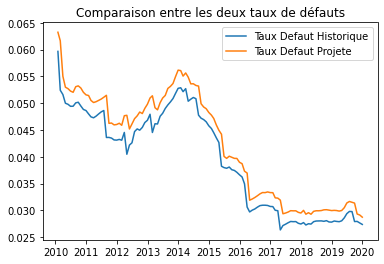

In [15]:
DR_Histo = pd.read_excel("DR_Histo.xlsx")
DR_Histo=pd.concat([DR_Histo,pd.DataFrame(DR_annuel)],axis=1)
DR_Histo.columns=["Date","Taux_Defaut_Historique","Taux_Defaut_Projete"]
plt.plot(DR_Histo["Date"],DR_Histo["Taux_Defaut_Historique"])
plt.plot(DR_Histo["Date"],DR_Histo["Taux_Defaut_Projete"])
plt.legend(["Taux Defaut Historique","Taux Defaut Projete"])
plt.title("Comparaison entre les deux taux de défauts")
plt.show()


## Mise en place d'un AR pour le taux de defaut projete

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


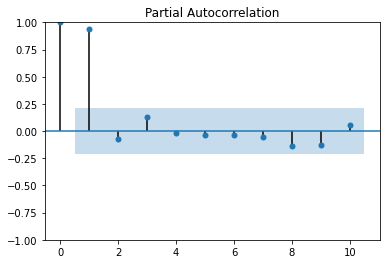

In [29]:
# from statsmodels.tsa.ar_model import AutoReg
# from statsmodels.graphics.tsaplots import plot_pacf

# pacf = plot_pacf(DR_annuel, lags=10)
# ar_model = AutoReg(DR_annuel, lags=1).fit()
# pred = ar_model.predict(start=0, end=len(DR_annuel)-1, dynamic=False)

# DR_Histo=pd.concat([DR_Histo,pd.DataFrame(pred)],axis=1)


## Exportation du taux de defaut projete

In [19]:
# DR_Histo.columns=["Date","Taux_Defaut_Historique","Taux_Defaut_Projete","AR"]
DR_Histo.to_excel("Taux_Defaut_Projet.xlsx")

# Modele Satellite ML

In [31]:
DR_Histo.head(85)

,Date,Taux_Defaut_Historique,Taux_Defaut_Projete,AR
0,2010-01-31,0.059661,0.063233,NaN
1,2010-02-28,0.052415,0.061639,0.062451
2,2010-03-31,0.051614,0.055020,0.060900
3,2010-04-30,0.049995,0.052987,0.054460
4,2010-05-31,0.049792,0.052707,0.052481
...,...,...,...,...
80,2016-09-30,0.030966,0.033329,0.033119
81,2016-10-31,0.030967,0.033316,0.033354
82,2016-11-30,0.030922,0.033445,0.033341
83,2016-12-31,0.030736,0.033321,0.033466


In [32]:
base_diff = pd.read_excel("base_diff4.xlsx")
m=[0]
m.extend(DR_annuel)
base_diff = pd.concat([base_diff,pd.DataFrame(m)],axis=1)
X_train = base_diff.iloc[1:84,3:]
X_test = base_diff.iloc[84:,3:]
y_train = DR_Histo["Taux_Defaut_Projete"].iloc[1:84,]
y_test = DR_Histo["Taux_Defaut_Historique"].iloc[84:,]

In [33]:
X_test.iloc[:1,:]

,Tx_Chomage_M,Ita_coin,B_T_Climate,LCI,Tx_IPC,Tx_interet_CT,Tx_interet_LT,Confiance_conso,Confiance_ent,Ind_Inc_Pol_Eco,Qt_Euribor1,Qt_Euribor2,Qt_FTSE,Qt_Enel,Qt_Eni,Qt_Exor,Qt_Generali,Tx_I_Deposits_E,Qt_Cours_actions,Tx_I_Loans,Tx_Bond_Yields_10,USD_euro_change,Tx_Pret_Menage,Tx_Pret_SNF,BOP_Compte_Courant,BOP_Biens,BOP_Services,BOP_Capital,Qt_GT_Pret_bancaire,Qt_GT_credit_conso,Qt_GT_credit_immo,Qt_GT_taux_interet,Tx_bons_tresor,Qt_VIX,Qt_Telecom_ita,Qt_IXIC_NASDAQ,Tx_Deposit_Resident,Tx_Interet_Deposit,Tx_Interet_Deposit_Over,Tx_Interet_Loans_House,Tx_Interet_Loans_Othe,Tx_Bon_Tresor_3,Tx_Bon_Tresor_5,Tx_Bon_Tresor_10,Tx_Bon_Tresor_30,Qt_M1,Qt_M2,Qt_M3,Tx_Fund_Raised,Tx_Refinancing,Tx_Debt_Securities,Tx_Total_Deposit,Tx_Loans_Other,Tx_Loans_Household,Tx_Loans_NonFinancial,Tx_Debt_CB,Qt_Debt_Monetary,Qt_Debt_Financial,Qt_Debt_Resident,Qt_Debt_NonResident,Qt_Debt_Gross,Qt_Stock_Gov,0
84,10.9,0.51,1.8,1.6314,0.897308,-0.3279,1.794,1.36789,0.9359,-9.9475,-1.579638e-13,0.0001,0.234638,0.279496,0.019237,0.389205,0.080147,0.3832,0.187019,1.8966,1.794,-0.4,2.77,0.15,-190.624,-195.641,-127.581,-592.58,-0.204794,3.0,1.098612,0.498991,-0.407,0.121575,-0.091895,0.277626,3.64,0.3832,0.064,1.8966,1.5042,-0.01832,0.52223,1.79452,3.05699,0.08635,0.014735,0.054188,0.44,23.23,-16.1,-2.2,1.79,2.77,0.15,15.621631,-0.075223,-0.0497,-0.078643,0.00314,0.014763,0.014225,0.033321


## LSTM Multivariate

## Gradient Boost

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

prediction=[]
for i in range(0:36):
  reg = GradientBoostingRegressor(random_state=0,max_depth=7,n_estimators=500,learning_rate=0.01)
  reg.fit(X_train, y_train)
  X_test2 = X_test.iloc[i,:]
  prediction.append(reg.predict(X_test2))
  X_test.iloc[]
reg.score(X_test,y_test)

SyntaxError: ignored

In [ ]:
X_train.head(10)

## Random Forest

Choix du meilleur modele :

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import warnings; warnings.simplefilter('ignore')

n_estimators = [1000,1500,2000,4000]
max_depth = [50, 100, 200, 300]
min_samples_split = [0.1, 0.05, 0.03]
learning_rate = [1,0.5,0.2,0.1,0.01,0.001]
class_weight=[None,"balanced"]

parameters = {'n_estimators': n_estimators ,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'learning_rate' : learning_rate
              #'class_weight' : class_weight
}

RF = GradientBoostingRegressor()

clf = GridSearchCV(RF, parameters, scoring="r2", cv=5)
clf.fit(X_train, y_train)


In [ ]:
gridsearch_result = pd.DataFrame(clf.cv_results_["params"])
gridsearch_result["score"] = clf.cv_results_["mean_test_score"]
gridsearch_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack()

In [ ]:
clf.best_score_

In [ ]:
gridsearch_result[["n_estimators","max_depth","score"]].groupby(["n_estimators","max_depth"]).mean().unstack().plot()


# Methode alternative : Modelisation pour chaque cellule matrice PIT cumulée

## Mise en Data des Cellules de chaque PIT Cumule
Pour permettre la production de la méthode alternative

In [37]:
Data_Cellule = {}
dates = pd.date_range(start='20100130',freq="M",periods=84)
for i in range(0,10) :
  matrice=[]
  for j in range(0,11):
    liste=[]
    for k in range(1,85):
      liste.append(PIT_CUMULE[k].iloc[i,j])
    matrice.append(liste)
  Data_Cellule["Classe_"+str(i+1)]=pd.DataFrame(np.transpose(matrice), columns=["1","2","3","4","5","6","7","8","9","10","D"],index=dates)


In [ ]:
Data_Cellule["Classe_1"]

,1,2,3,4,5,6,7,8,9,10,D
2010-01-31,1.0,0.230486,0.115205,0.038087,0.019877,0.015677,0.009059,0.004415,0.002459,0.001322,0.000778
2010-02-28,1.0,0.249680,0.122844,0.040507,0.021593,0.016835,0.009551,0.004528,0.002699,0.001566,0.000896
2010-03-31,1.0,0.266746,0.130466,0.044050,0.024235,0.018742,0.010693,0.004787,0.002947,0.001748,0.001100
2010-04-30,1.0,0.284760,0.137417,0.046228,0.025545,0.019369,0.010623,0.004455,0.002802,0.001771,0.001095
2010-05-31,1.0,0.284954,0.139810,0.046665,0.025431,0.019273,0.010851,0.004561,0.002879,0.001754,0.001120
...,...,...,...,...,...,...,...,...,...,...,...
2016-08-31,1.0,0.298029,0.151734,0.043291,0.021159,0.016188,0.006798,0.002006,0.001082,0.000512,0.000210
2016-09-30,1.0,0.295590,0.150208,0.043403,0.021329,0.016398,0.006939,0.002128,0.001155,0.000552,0.000248
2016-10-31,1.0,0.295836,0.150024,0.043751,0.021875,0.016762,0.007109,0.002221,0.001221,0.000579,0.000262
2016-11-30,1.0,0.299075,0.151262,0.044017,0.022107,0.016986,0.007178,0.002242,0.001224,0.000591,0.000262


## Exportation des donnée 

In [38]:
vecteur=["Classe_1","Classe_2","Classe_3","Classe_4","Classe_5","Classe_6","Classe_7","Classe_8","Classe_9","Classe_10"]
for i in vecteur:
  Data_Cellule[i].to_excel("Cellule_PIT_Cumule/Cellule_"+str(i)+".xlsx")

## Tests et Creation PIT Cumule predite en fonction des differentes methodes

### AdaLasso

Recuperation de chaque tableau de chaque classe (chaque ligne)

In [19]:
AdaLasso = {}
for i in range(1,11) :
  AdaLasso[i] = pd.read_excel("Prediction Cellule/PredictionCellule_AdaLasso.xlsx",sheet_name="Classe"+str(i))
  AdaLasso[i].drop(columns="Unnamed: 0",inplace=True)

Mise en place des PIT Cumule

In [20]:
PIT_Cumule_AdaLasso = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(AdaLasso[j].iloc[i,:])
  PIT_Cumule_AdaLasso[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_AdaLasso[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

Comparaison pra rpport au matrice cumule empirique

In [21]:
import sklearn.metrics as me
import math

listeAda=[]
for i in range(1,11):
  for j in range(0,10):
    listeAda.append(PIT_Cumule_AdaLasso[12].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeAda))
print("MAE : ",me.mean_absolute_error(listePIT,listeAda))
print("MSE : ",me.mean_squared_error(listePIT,listeAda))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeAda)))

MAPE :  0.2344955814120263
MAE :  0.003652814884887911
MSE :  6.756277822476524e-05
RMSE :  0.008219658035755821


In [34]:
listeAda=[]
for i in range(1,11):
  for j in range(0,10):
    listeAda.append(PIT_Cumule_AdaLasso[24].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeAda))
print("MAE : ",me.mean_absolute_error(listePIT,listeAda))
print("MSE : ",me.mean_squared_error(listePIT,listeAda))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeAda)))

MAPE :  0.42206577624618874
MAE :  0.004447304212361572
MSE :  7.888898888095167e-05
RMSE :  0.008881947358600572


In [35]:
listeAda=[]
for i in range(1,11):
  for j in range(0,10):
    listeAda.append(PIT_Cumule_AdaLasso[36].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeAda))
print("MAE : ",me.mean_absolute_error(listePIT,listeAda))
print("MSE : ",me.mean_squared_error(listePIT,listeAda))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeAda)))

MAPE :  0.4439531573797049
MAE :  0.0036642189450512754
MSE :  9.700656128992105e-05
RMSE :  0.009849190895191394


Passage Des Cumules au PIT Normal

In [22]:
PIT_AdaLasso = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_AdaLasso[i].iloc[j,k]-PIT_Cumule_AdaLasso[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_AdaLasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_AdaLasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])
  PIT_AdaLasso[i].to_excel("Matrice Predite/AdaLasso"+str(i)+"_Cellule.xlsx")
  


Exportation des données :

In [37]:
for i in range(0,37):
  PIT_AdaLasso[i].to_excel("Prediction Cellule/AdaLasso/PIT_Adalasso"+str(i)+".xlsx")

### MSAENET

In [40]:
Msaenet = {}
for i in range(1,11):
  Msaenet[i] = pd.read_excel("Prediction Cellule/PredictionCellule_MSAENET.xlsx",sheet_name="Classe"+str(i))
  Msaenet[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Msaenet = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Msaenet[j].iloc[i,:])
  PIT_Cumule_Msaenet[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Msaenet[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeMsa=[]
for i in range(1,11):
  for j in range(0,10):
    listeMsa.append(PIT_Cumule_Msaenet[12].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeMsa))
print("MAE : ",me.mean_absolute_error(listePIT,listeMsa))
print("MSE : ",me.mean_squared_error(listePIT,listeMsa))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeMsa)))

listeMsa=[]
for i in range(1,11):
  for j in range(0,10):
    listeMsa.append(PIT_Cumule_Msaenet[24].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeMsa))
print("MAE : ",me.mean_absolute_error(listePIT,listeMsa))
print("MSE : ",me.mean_squared_error(listePIT,listeMsa))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeMsa)))

listeMsa=[]
for i in range(1,11):
  for j in range(0,10):
    listeMsa.append(PIT_Cumule_Msaenet[36].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeMsa))
print("MAE : ",me.mean_absolute_error(listePIT,listeMsa))
print("MSE : ",me.mean_squared_error(listePIT,listeMsa))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeMsa)))

PIT_Msaenet = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Msaenet[i].iloc[j,k]-PIT_Cumule_Msaenet[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Msaenet[i].iloc[j,10])
    liste.append(compteur)
  PIT_Msaenet[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])


MAPE :  0.6092658628576876
MAE :  0.00599597646308883
MSE :  0.00017762725912247584
RMSE :  0.013327687688510555
MAPE :  0.4195354425349936
MAE :  0.00490618360771022
MSE :  9.536102800502137e-05
RMSE :  0.009765297128353103
MAPE :  0.5170548464983592
MAE :  0.0031143386004129445
MSE :  3.6310064813816006e-05
RMSE :  0.006025783336116227


In [48]:
for i in range(0,37):
  PIT_Msaenet[i].to_excel("Prediction Cellule/Msaenet/PIT_Msaenet"+str(i)+".xlsx")

### Ridge

In [44]:
Ridge = {}
for i in range(1,11):
  Ridge[i] = pd.read_excel("Prediction Cellule/PredictionCellule_Ridge.xlsx",sheet_name="Classe"+str(i))
  Ridge[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Ridge = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Ridge[j].iloc[i,:])
  PIT_Cumule_Ridge[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Ridge[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Ridge[12].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Ridge[24].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Ridge[36].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_Ridge = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Ridge[i].iloc[j,k]-PIT_Cumule_Ridge[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Ridge[i].iloc[j,10])
    liste.append(compteur)
  PIT_Ridge[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])
  PIT_Ridge[i].to_excel("/Matrice")

MAPE :  0.5172270153098153
MAE :  0.003435009613994602
MSE :  4.900572176228086e-05
RMSE :  0.007000408685375509
MAPE :  0.23065772247159202
MAE :  0.003255231707716506
MSE :  4.2537984188721605e-05
RMSE :  0.006522115008854229
MAPE :  0.3939285157844142
MAE :  0.004751425337228022
MSE :  0.00010273966645871308
RMSE :  0.010136057737538449


In [47]:
for i in range(0,37):
  PIT_Ridge[i].to_excel("Prediction Cellule/Ridge/PIT_Ridge"+str(i)+".xlsx")

### Lasso

In [15]:
Lasso = {}
for i in range(1,11):
  Lasso[i] = pd.read_excel("Prediction Cellule/PredictionCellule_Lasso.xlsx",sheet_name="Classe"+str(i))
  Lasso[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Lasso = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Lasso[j].iloc[i,:])
  PIT_Cumule_Lasso[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Lasso[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Lasso[12].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Lasso[24].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Lasso[36].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_Lasso = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Lasso[i].iloc[j,k]-PIT_Cumule_Lasso[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Lasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_Lasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.5682843520129164
MAE :  0.003439657933592757
MSE :  5.7110371724460844e-05
RMSE :  0.00755714044625749
MAPE :  0.47227183192790195
MAE :  0.005007755251794679
MSE :  9.437624842762508e-05
RMSE :  0.00971474386834903
MAPE :  0.5729843452584099
MAE :  0.005956335387294018
MSE :  0.0001615291655533952
RMSE :  0.012709412478686621


In [49]:
for i in range(0,37):
  PIT_Lasso[i].to_excel("Prediction Cellule/Lasso/PIT_Lasso"+str(i)+".xlsx")

### Elastic

In [14]:
Elastic = {}
for i in range(1,11):
  Elastic[i] = pd.read_excel("Prediction Cellule/PredictionCellule_Elastic.xlsx",sheet_name="Classe"+str(i))
  Elastic[i].drop(columns="Unnamed: 0",inplace=True)

PIT_Cumule_Elastic = {}
mo = pd.DataFrame([1,1,1,1,1,1,1,1,1,1],index=["1","2","3","4","5","6","7","8","9","10"])
for i in range(0,37):
  liste=[]
  for j in range(1,11):
    liste.append(Elastic[j].iloc[i,:])
  PIT_Cumule_Elastic[i]=mo.merge(pd.DataFrame(liste,index=["1","2","3","4","5","6","7","8","9","10"]),left_index=True,right_index=True)
  PIT_Cumule_Elastic[i].rename(columns={0:'1','Ligne_1':'2','Ligne_2':'3','Ligne_3':'4','Ligne_4':'5','Ligne_5':'6','Ligne_6':'7','Ligne_7':'8','Ligne_8':'9','Ligne_9':'10','Ligne_10':'11'},inplace=True)

import sklearn.metrics as me
import math

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Elastic[12].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Elastic[24].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Cumule_Elastic[36].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_Elastic = {}
for i in range(0,37):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Cumule_Elastic[i].iloc[j,k]-PIT_Cumule_Elastic[i].iloc[j,k+1])
    compteur.append(PIT_Cumule_Elastic[i].iloc[j,10])
    liste.append(compteur)
  PIT_Elastic[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.5469975336911961
MAE :  0.0031939228792988617
MSE :  4.799413593914006e-05
RMSE :  0.006927780015209783
MAPE :  0.4519475074834139
MAE :  0.004182618202187842
MSE :  6.534450321871235e-05
RMSE :  0.008083594696588415
MAPE :  0.5316608845403225
MAE :  0.0052756749455712786
MSE :  0.00014568519282869425
RMSE :  0.01207001213042863


In [50]:
for i in range(0,37):
  PIT_Elastic[i].to_excel("Prediction Cellule/Elastic/PIT_Elastic"+str(i)+".xlsx")

# Methode alternative : Credit Index

## AdaLasso

In [44]:
PIT_CreditIndex_AdaLasso = {}
PIT_CreditIndex_AdaLasso[1] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_adalasso.xlsx",sheet_name="PIT12")
PIT_CreditIndex_AdaLasso[1] = PIT_CreditIndex_AdaLasso[1].iloc[:,1:]
PIT_CreditIndex_AdaLasso[2] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_adalasso.xlsx",sheet_name="PIT24")
PIT_CreditIndex_AdaLasso[2] = PIT_CreditIndex_AdaLasso[2].iloc[:,1:]
PIT_CreditIndex_AdaLasso[3] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_adalasso.xlsx",sheet_name="PIT36")
PIT_CreditIndex_AdaLasso[3] = PIT_CreditIndex_AdaLasso[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_AdaLasso[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_AdaLasso[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_AdaLasso[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_CI_AdaLasso = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_CreditIndex_AdaLasso[i].iloc[j,k]-PIT_CreditIndex_AdaLasso[i].iloc[j,k+1])
    compteur.append(PIT_CreditIndex_AdaLasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_CI_AdaLasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])
  PIT_CI_AdaLasso[i].to_excel("Matrice Predite/PIT_AdaLasso"+str(i)+"_CreditIndex.xlsx")

MAPE :  0.5523786084486046
MAE :  0.05762916212216738
MSE :  0.01239596690004915
RMSE :  0.11133717663049099
MAPE :  0.728165592569803
MAE :  0.17792657030834844
MSE :  0.09253455519750343
RMSE :  0.30419492960518496
MAPE :  0.7420005474245728
MAE :  0.190306341936859
MSE :  0.10442168466646823
RMSE :  0.3231434428647257


## Lasso

In [42]:
PIT_CreditIndex_Lasso = {}
PIT_CreditIndex_Lasso[1] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_lasso.xlsx",sheet_name="PIT12")
PIT_CreditIndex_Lasso[1] = PIT_CreditIndex_Lasso[1].iloc[:,1:]
PIT_CreditIndex_Lasso[2] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_lasso.xlsx",sheet_name="PIT24")
PIT_CreditIndex_Lasso[2] = PIT_CreditIndex_Lasso[2].iloc[:,1:]
PIT_CreditIndex_Lasso[3] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_lasso.xlsx",sheet_name="PIT36")
PIT_CreditIndex_Lasso[3] = PIT_CreditIndex_Lasso[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Lasso[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Lasso[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Lasso[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_CI_Lasso = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_CreditIndex_Lasso[i].iloc[j,k]-PIT_CreditIndex_Lasso[i].iloc[j,k+1])
    compteur.append(PIT_CreditIndex_Lasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_CI_Lasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:91: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)


ValueError: ignored

## Ridge

In [38]:
PIT_CreditIndex_Ridge = {}
PIT_CreditIndex_Ridge[1] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_RIDGE.xlsx",sheet_name="PIT12")
PIT_CreditIndex_Ridge[1] = PIT_CreditIndex_Ridge[1].iloc[:,1:]
PIT_CreditIndex_Ridge[2] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_RIDGE.xlsx",sheet_name="PIT24")
PIT_CreditIndex_Ridge[2] = PIT_CreditIndex_Ridge[2].iloc[:,1:]
PIT_CreditIndex_Ridge[3] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_RIDGE.xlsx",sheet_name="PIT36")
PIT_CreditIndex_Ridge[3] = PIT_CreditIndex_Ridge[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Ridge[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Ridge[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Ridge[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_CI_Ridge = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_CreditIndex_Ridge[i].iloc[j,k]-PIT_CreditIndex_Ridge[i].iloc[j,k+1])
    compteur.append(PIT_CreditIndex_Ridge[i].iloc[j,10])
    liste.append(compteur)
  PIT_CI_Ridge[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  1.2700152793578223
MAE :  0.22557156490924757
MSE :  0.13752909682314157
RMSE :  0.37084915642770655
MAPE :  0.7562430039637182
MAE :  0.3082107045008915
MSE :  0.23238122233628766
RMSE :  0.48205935561535124
MAPE :  0.815968073288601
MAE :  0.31860460768373916
MSE :  0.24563083991973816
RMSE :  0.4956115817046028


## Msaenet

In [39]:
PIT_CreditIndex_Msaenet = {}
PIT_CreditIndex_Msaenet[1] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_MSAENET.xlsx",sheet_name="PIT12")
PIT_CreditIndex_Msaenet[1] = PIT_CreditIndex_Msaenet[1].iloc[:,1:]
PIT_CreditIndex_Msaenet[2] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_MSAENET.xlsx",sheet_name="PIT24")
PIT_CreditIndex_Msaenet[2] = PIT_CreditIndex_Msaenet[2].iloc[:,1:]
PIT_CreditIndex_Msaenet[3] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_MSAENET.xlsx",sheet_name="PIT36")
PIT_CreditIndex_Msaenet[3] = PIT_CreditIndex_Msaenet[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Msaenet[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Msaenet[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Msaenet[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_CI_Msaenet = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_CreditIndex_Msaenet[i].iloc[j,k]-PIT_CreditIndex_Msaenet[i].iloc[j,k+1])
    compteur.append(PIT_CreditIndex_Msaenet[i].iloc[j,10])
    liste.append(compteur)
  PIT_CI_Msaenet[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.798967246675713
MAE :  0.27316794353748625
MSE :  0.18898506612763755
RMSE :  0.4347241264614118
MAPE :  0.8878263734847002
MAE :  0.3535713719908322
MSE :  0.2929518622892933
RMSE :  0.5412502769415396
MAPE :  0.8444170845525018
MAE :  0.33117903069594334
MSE :  0.26288931122956066
RMSE :  0.5127273263924604


## Elastic Net

In [40]:
PIT_CreditIndex_Elastic = {}
PIT_CreditIndex_Elastic[1] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_ELAS.xlsx",sheet_name="PIT12")
PIT_CreditIndex_Elastic[1] = PIT_CreditIndex_Elastic[1].iloc[:,1:]
PIT_CreditIndex_Elastic[2] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_ELAS.xlsx",sheet_name="PIT24")
PIT_CreditIndex_Elastic[2] = PIT_CreditIndex_Elastic[2].iloc[:,1:]
PIT_CreditIndex_Elastic[3] = pd.read_excel("Matrice PIT credit index/Credit Index to Matrice Cumule_ELAS.xlsx",sheet_name="PIT36")
PIT_CreditIndex_Elastic[3] = PIT_CreditIndex_Elastic[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Elastic[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Elastic[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_CreditIndex_Elastic[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_CI_Elastic = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_CreditIndex_Elastic[i].iloc[j,k]-PIT_CreditIndex_Elastic[i].iloc[j,k+1])
    compteur.append(PIT_CreditIndex_Elastic[i].iloc[j,10])
    liste.append(compteur)
  PIT_CI_Elastic[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.5808220368571749
MAE :  0.0708454832039837
MSE :  0.024730724194060003
RMSE :  0.15726005275994284
MAPE :  0.7367029866771472
MAE :  0.18546899172113762
MSE :  0.10147764970355314
RMSE :  0.31855556768569143
MAPE :  0.7535573475001105
MAE :  0.20121886302530675
MSE :  0.11721956732620142
RMSE :  0.34237343256479674


# Methode Classique : Matrice PIT

## AdaLasso

In [31]:
PIT_Predit_AdaLasso = {}
PIT_Predit_AdaLasso[1] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Adalasso.xlsx",sheet_name="PIT12")
PIT_Predit_AdaLasso[1] = PIT_Predit_AdaLasso[1].iloc[:,1:]
PIT_Predit_AdaLasso[2] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Adalasso.xlsx",sheet_name="PIT24")
PIT_Predit_AdaLasso[2] = PIT_Predit_AdaLasso[2].iloc[:,1:]
PIT_Predit_AdaLasso[3] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Adalasso.xlsx",sheet_name="PIT36")
PIT_Predit_AdaLasso[3] = PIT_Predit_AdaLasso[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_AdaLasso[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_AdaLasso[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_AdaLasso[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_P_AdaLasso = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Predit_AdaLasso[i].iloc[j,k]-PIT_Predit_AdaLasso[i].iloc[j,k+1])
    compteur.append(PIT_Predit_AdaLasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_P_AdaLasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])
  PIT_P_AdaLasso[i].to_excel("Matrice Predite/PIT_Adalasso"+str(i)+"_Classique.xlsx")

MAPE :  0.5816881611529768
MAE :  0.005710279352598883
MSE :  0.00014270041452613114
RMSE :  0.01194572787761931
MAPE :  0.47242751124675225
MAE :  0.006667960256594092
MSE :  0.0001983426921428763
RMSE :  0.01408341905017657
MAPE :  0.5890942065647302
MAE :  0.007703955584874304
MSE :  0.000286511393991086
RMSE :  0.016926647452791294


## Lasso

In [25]:
PIT_Predit_Lasso = {}
PIT_Predit_Lasso[1] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Lasso.xlsx",sheet_name="PIT12")
PIT_Predit_Lasso[1] = PIT_Predit_Lasso[1].iloc[:,1:]
PIT_Predit_Lasso[2] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Lasso.xlsx",sheet_name="PIT24")
PIT_Predit_Lasso[2] = PIT_Predit_Lasso[2].iloc[:,1:]
PIT_Predit_Lasso[3] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Lasso.xlsx",sheet_name="PIT36")
PIT_Predit_Lasso[3] = PIT_Predit_Lasso[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Lasso[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Lasso[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Lasso[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_P_Lasso = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Predit_Lasso[i].iloc[j,k]-PIT_Predit_Lasso[i].iloc[j,k+1])
    compteur.append(PIT_Predit_Lasso[i].iloc[j,10])
    liste.append(compteur)
  PIT_P_Lasso[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.9050979404687638
MAE :  0.005714097712755653
MSE :  0.00013619076548014052
RMSE :  0.011670079926039089
MAPE :  0.7459589905573286
MAE :  0.006394874190189348
MSE :  0.00018453727026184797
RMSE :  0.013584449575225636
MAPE :  0.9166645794141671
MAE :  0.0075017307427334545
MSE :  0.0002875306564084355
RMSE :  0.016956728941881317


## Ridge

In [27]:
PIT_Predit_Ridge= {}
PIT_Predit_Ridge[1] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Ridge.xlsx",sheet_name="PIT12")
PIT_Predit_Ridge[1] = PIT_Predit_Ridge[1].iloc[:,1:]
PIT_Predit_Ridge[2] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Ridge.xlsx",sheet_name="PIT24")
PIT_Predit_Ridge[2] = PIT_Predit_Ridge[2].iloc[:,1:]
PIT_Predit_Ridge[3] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Ridge.xlsx",sheet_name="PIT36")
PIT_Predit_Ridge[3] = PIT_Predit_Ridge[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Ridge[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Ridge[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Ridge[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_P_Ridge = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Predit_Ridge[i].iloc[j,k]-PIT_Predit_Ridge[i].iloc[j,k+1])
    compteur.append(PIT_Predit_Ridge[i].iloc[j,10])
    liste.append(compteur)
  PIT_P_Ridge[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.9477433899109847
MAE :  0.005853109960953776
MSE :  0.00014032702656566166
RMSE :  0.011845970900085044
MAPE :  0.7877278654187881
MAE :  0.0065669556837031975
MSE :  0.000191848838088156
RMSE :  0.013850950800871252
MAPE :  0.9364243489286893
MAE :  0.0075984347483184335
MSE :  0.0002912704898666636
RMSE :  0.01706664846613604


## Elastic Net

In [28]:
PIT_Predit_Elastic = {}
PIT_Predit_Elastic[1] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Elastic.xlsx",sheet_name="PIT12")
PIT_Predit_Elastic[1] = PIT_Predit_Elastic[1].iloc[:,1:]
PIT_Predit_Elastic[2] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Elastic.xlsx",sheet_name="PIT24")
PIT_Predit_Elastic[2] = PIT_Predit_Elastic[2].iloc[:,1:]
PIT_Predit_Elastic[3] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Elastic.xlsx",sheet_name="PIT36")
PIT_Predit_Elastic[3] = PIT_Predit_Elastic[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Elastic[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Elastic[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Elastic[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_P_Elastic = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Predit_Elastic[i].iloc[j,k]-PIT_Predit_Elastic[i].iloc[j,k+1])
    compteur.append(PIT_Predit_Elastic[i].iloc[j,10])
    liste.append(compteur)
  PIT_P_Elastic[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.9121845980892842
MAE :  0.005737708933425449
MSE :  0.00013677462208891046
RMSE :  0.01169506828064336
MAPE :  0.7562885978497443
MAE :  0.006435672347441619
MSE :  0.00018627645317005755
RMSE :  0.013648313198709119
MAPE :  0.9262922946600674
MAE :  0.007534647270137672
MSE :  0.00028922019239269745
RMSE :  0.017006475013732196


## MSAENET

In [29]:
PIT_Predit_Msaenet = {}
PIT_Predit_Msaenet[1] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Msaenet.xlsx",sheet_name="PIT12")
PIT_Predit_Msaenet[1] = PIT_Predit_Msaenet[1].iloc[:,1:]
PIT_Predit_Msaenet[2] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Msaenet.xlsx",sheet_name="PIT24")
PIT_Predit_Msaenet[2] = PIT_Predit_Msaenet[2].iloc[:,1:]
PIT_Predit_Msaenet[3] = pd.read_excel("Matrice PIT taux de défaut projetés/Matrice projetée_Msaenet.xlsx",sheet_name="PIT36")
PIT_Predit_Msaenet[3] = PIT_Predit_Msaenet[3].iloc[:,1:]

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Msaenet[1].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[97].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Msaenet[2].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[108].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

listeR=[]
for i in range(1,11):
  for j in range(0,10):
    listeR.append(PIT_Predit_Msaenet[3].iloc[j,i])
listePIT=[]
for i in range(1,11):
  for j in range(0,10):
    listePIT.append(PIT_CUMULE[120].iloc[j,i])

print("MAPE : ",me.mean_absolute_percentage_error(listePIT,listeR))
print("MAE : ",me.mean_absolute_error(listePIT,listeR))
print("MSE : ",me.mean_squared_error(listePIT,listeR))
print("RMSE : ",math.sqrt(me.mean_squared_error(listePIT,listeR)))

PIT_P_Msaenet = {}
for i in range(1,4):
  liste=[]
  for j in range(0,10):
    compteur=[]
    for k in range(0,10):
      compteur.append(PIT_Predit_Msaenet[i].iloc[j,k]-PIT_Predit_Msaenet[i].iloc[j,k+1])
    compteur.append(PIT_Predit_Msaenet[i].iloc[j,10])
    liste.append(compteur)
  PIT_P_Msaenet[i]=pd.DataFrame(liste,columns=["1","2","3","4","5","6","7","8","9","10","D"],index=["1","2","3","4","5","6","7","8","9","10"])

MAPE :  0.9352916628243731
MAE :  0.005816801805205401
MSE :  0.00013887259072342908
RMSE :  0.011784421526890028
MAPE :  0.7631211650913251
MAE :  0.006485896542897649
MSE :  0.00018828331520692797
RMSE :  0.013721636753934566
MAPE :  0.9750618120712263
MAE :  0.00769922704684252
MSE :  0.00029795456571744724
RMSE :  0.017261360482808047


# Plot pour diapo

In [93]:
df3.iloc[:,1].value_counts()

12    979247
2      55462
1      39413
3      26221
6       8532
7       7482
11      7326
5       6218
4       6093
8       2144
9       2019
10      1021
Name: Date0, dtype: int64

In [96]:
df3.iloc[:,132].value_counts()

12    676972
2     118960
3      95856
1      89107
4      38893
6      37532
5      34959
7      24806
8       7631
11      7583
9       6499
10      2380
Name: Date131, dtype: int64